<img src='./figures/logo-ecole-polytechnique-ve.jpg' style='position:absolute; top:0; right:0;' width='100px' height='' alt='' />

<center>**Bachelor of Ecole Polytechnique**</center>
<center>Computational Mathematics, year 2, semester 1</center>
<center>Lecturer: Lucas Gerin <a href="mailto:lucas.gerin@polytechnique.edu">(send mail)</a></center>

# Graphs and Matrices 2: Solving some Probabilistic Models


## Table of contents

- [Model 1: The Frog](#frog)
- [Model 2: Opinion propagation among sheeps](#Sheeps)
- [Model 3: OK Corral](#Corral)
- [Bonus: The birthday paradox](#birthday)


In [1]:
# execute this part to modify the css style
from IPython.core.display import HTML
def css_styling():
    styles = open("./style/custom2.css").read()
    return HTML(styles)
css_styling()


In [2]:
## loading python libraries

# necessary to display plots inline:
%matplotlib inline   

# load the libraries
import matplotlib.pyplot as plt # 2D plotting library
import numpy as np              # package for scientific computing  

from math import *              # package for mathematics (pi, arctan, sqrt, factorial ...)
import sympy as sympy             # package for symbolic computation
from sympy import *


<!--<div markdown=1 class="Rmk"> Here is the Latex code of a matrix that you can copy/paste throughout the notebook:
$$
M=
\begin{matrix}
v_1 \\ v_2 \\ v_3 
\end{matrix}
\begin{pmatrix}
1 & 1 & 0\\
0 & 0 & 1\\
0 & 1 & 0\\
\end{pmatrix}.
$$-->


<a id="frog"></a>
## Model 1: The frog riddle <font size='-0.5'>(or how to become a trader?)</font>

This is a maths puzzle which used to be asked in job interviews (to be hired as a quantitative analyst or trader).

Here is the puzzle: a frog starts from the bank of a river located at $x=0$. The other bank is located at $x=10$. It first jumps uniformly at random in $\{1,2,\dots,10\}$ (if it jumps at $10$ the frog has crossed the river and the process is over). Then, at each time step, if it is located at some $y<10$ then it jumps at a uniform location in $\{y+1,\dots,10\}$.

<img src="figures/Grenouille.jpg" style="width: 700px;"/>


The questions we ask are
* What is the probability distribution of the total number of steps  before reaching the bank?
* What is the average number of steps before reaching bank?</i>


<div markdown=1 class="DoIt"> 
For $n\geq 0$ let $X_n\in\{0,1,\dots, 10\}$ be the location of the frog at time $n$. Let also $T$ be the random variable given by the number of steps needed to reach the other bank. Namely,
$$
T=\min \{n\geq 0\text{ such that }X_n=10\}. 
$$

1. Write a script which computes the matrix $Q=(Q_{i,j})_{0\leq i,j \leq 10} $ associated to the Markov chain $(X_n)_n$. 
2. Write a function `DistributionFrog(i,n)` which computes the probability that the frog is at location `i` at time `n` (<i>i.e.</i>  $\mathbb{P}(X_n=i)$).
3. Write $\mathbb{P}(T=t)$ as a function of $\mathbb{P}(X_n=i)$ for some well chosen $n$'s and $i$'s.. Plot the distribution $t\mapsto \mathbb{P}(T=t)$. What is the more likely value for $T$?

<div markdown=1 class="Answers">

1. 
2. 
3. 

[[0.         0.1        0.1        0.1        0.1        0.1
  0.1        0.1        0.1        0.1        0.1       ]
 [0.         0.         0.11111111 0.11111111 0.11111111 0.11111111
  0.11111111 0.11111111 0.11111111 0.11111111 0.11111111]
 [0.         0.         0.         0.125      0.125      0.125
  0.125      0.125      0.125      0.125      0.125     ]
 [0.         0.         0.         0.         0.14285714 0.14285714
  0.14285714 0.14285714 0.14285714 0.14285714 0.14285714]
 [0.         0.         0.         0.         0.         0.16666667
  0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]
 [0.         0.         0.         0.         0.         0.
  0.2        0.2        0.2        0.2        0.2       ]
 [0.         0.         0.         0.         0.         0.
  0.         0.25       0.25       0.25       0.25      ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.33333333 0.33333333 0.33333333]
 [0.         0.         0.  

ValueError: Unrecognized character = in format string

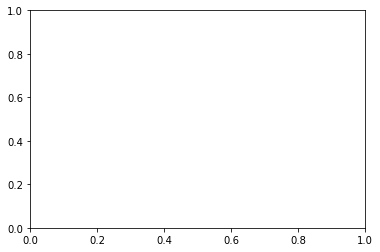

In [22]:
# Question 1
Q = np.zeros((11,11))
for i in range(0,11):
    for j in range(0,11):
        if j>i:
            Q[i][j]+=1/(10-i)
Q[10][10]=1

print (Q)

# Question 2

def DistributionFrog(i,n):
    Power = np.linalg.matrix_power(Q,n)
    return Power[0,i]



# Question 3
def DistributionT(t):
    if t==0:
        return 0
    return DistributionFrog(10,t)-DistributionFrog(10,t-1)

plt.plot([DistributionT(t) for t in range(8)], 'o=')
plt.show()

<div markdown=1 class="DoIt"> 

Question 4. Write a script which computes an approximation of $\mathbb{E}[T]$.

<div markdown=1 class="Answers"> <i>Your strategy here.</i>

<a id='Sheeps'></a>
## Model 2. Opinion propagation among sheeps

<img src="figures/SheepsMacWindows.jpg" style="width: 450px;"/>

Let $N>1$ be fixed and consider a population of $N$ sheeps, either pro-Mac or pro-Windows.<br>

Initially, $0\leq m\leq N$ sheeps are pro-Mac. At times $t= 0,1,2,...,$ a randomly and uniformly chosen sheep bleats its opinion and instantly one sheep of the other camp switches its opinion. The process ends when unanimity is reached.<br>

We will ask:
* what can we say about the number of pro-Mac sheeps at a given time?
* what is the probability that unanimity is reached for pro-Mac?

<div markdown=1 class="DoIt"> 

1. Let $M_k\in\{0,1,\dots,N\}$ be the number of pro-Mac sheeps at time $k$. Find the transition matrix $Q=(Q_{i,j})_{0\leq i,j \leq N} $ associated to this Markov chain $(M_k)_k$.
2. Using $Q$, write a function `ProbaSheeps(N,m,i,t)` which computes the probability that starting from $m$, there are exactly $i$ pro-Mac sheeps at time $t$.
3. Draw a plot of $i\mapsto $ `ProbaSheeps(N,m,i,t)` for $N=100, m=70, t=30$.

<div markdown=1 class="Answers"> 1. Fill in the matrix:
$$
Q= \begin{matrix}
0 \\ 1 \\ \vdots \\ i \\ \vdots  \\ N-1 \\ N
\end{matrix}
\begin{pmatrix}
1 & 0  & 0 &0 & 0   & 0  & 0 & 0\\
(N-1)/N & 0  & 1/N &0 & 0   & 0  & 0 & 0\\
 &  & \ddots &  &   & & \\
0 & 0  & (N-i)/N &0 & i/N   & 0  & 0 & 0\\
 &  &  &  & \ddots  &  & \\
0 & 0  & 0 &0 & 0   & 1/N  & 0 & (N-1)/N\\
0 & 0  & 0& 0 & 0   & 0  & 0 & 1
\end{pmatrix}.
$$
2. 

As $0$ and $N$ are absorbing states the process is eventually absorbed at $0$ or $N$: there is unanimity pro-Mac or pro-Windows among sheeps.

For fixed $N$ let $p_{m}$ denote the probability that the unanimity is achieved for Mac, starting from $m$ pro-Mac and $N-m$ pro-Windows sheeps. 

<div markdown=1 class="DoIt"> 

1. Assume that the Markov chain $(M_k)$ starts at $M_0=m$. Explain why 
$$
p_m = \lim_{k\to +\infty} \mathbb{P}(M_k = N).
$$<br>
(Hint: If you want to write a rigourous proof you may use Proposition 1.3 in the Lecture Notes of MAA203 or <a href="https://en.wikipedia.org/wiki/Measure_(mathematics)#Continuity_from_below">this link (Wikipedia)</a>.)
2. Use your function `ProbaSheeps(N,m,i,t)` to plot $m\mapsto p_{m}$ for $N=20$. (We consider that $k=N^2$ is large enough for the previous approximation to hold.)

<div markdown=1 class="Answers"> 
1. 

In [ ]:
# Question 2



<a id="Corral"></a>

## Model 3. OK Corral

We consider the following probabilistic model. <i>(Its name refers to <a href='https://en.wikipedia.org/wiki/Gunfight_at_the_O.K._Corral'>this historical event</a>.)</i><br>

Initially there is a  population of $N$ gangsters, $a$ of them belong to gang $A$ and $b=N-a$ belong to gang $B$. At times $t= 0,1,2,...,$ a randomly and uniformly chosen gangster (among survivors) kills a member of the other gang. The process ends when one of the gangs is wiped out.

We want to find:
* The probability that the gang $A$ wins (depending on $a,b$)
* The expected number of survivors of gang $A$ at the end of the gunfight.



<div markdown=1 class="DoIt"> Let $p(i,j)$ be the probability that Gang $A$ wins the gunfight against gang $B$, starting from respectively $i,j$ gangsters. 

1. Find $p(i,j)$ when $i$ or $j$ equals $0$.
2. For $i\geq 1$ and $j\geq 1$ write $p(i,j)$ as a function of $p(i,j-1)$ and $p(i-1,j)$.
3. Write a function which computes $p(i,j)$ and draw a plot of $i\mapsto p(i,b)$ for fixed $b=8$ and $1\leq i\leq 2b$. Is this consistent with intuition?

<div markdown=1 class="Answers"> 

1. 
2. 


<div markdown=1 class="DoIt"> Let $e(i,j)$ be the expected numbers of survivors of Gang $A$ after the gunfight starting from respectively $i,j$ gangsters. 

1. State a recursive formula for the $e(i,j)$.
2. Write a function which computes $e(i,j)$ and draw a plot of $i\mapsto e(i,b)$ for fixed $b=8$ and $1\leq a\leq 20$.

<div markdown=1 class="Answers"> 

<a id="birthday"></a>
## **Bonus** The birthday paradox
 
We consider the following problem. Consider a group of $n\geq 2$ people, we assume that their birthdays $X_1,\dots,X_n$ are uniformly distributed and independent in $\{1,2,\dots,k\}$, with $k=365$. The <i>birthday paradox</i> asks for the probability of the event

$$
E_{n,k} =\{ \text{ there exist }i\neq j, 1\leq i,j \leq n; X_i=X_j\}.
$$

Obviously we have that $\mathbb{P}(E_{n,365})=1$ as soon as $n\geq 365$. The so-called <i>paradox</i> is that a high probability is reached for quite small values of $n$.

<div markdown=1 class="DoIt"> Let $F_{n,k}$ be the complementary event of $E_{n,k}$.

1. Compute $\mathbb{P}(F_{1,k})$ and $\mathbb{P}(F_{2,k})$.
2. Compute
$$
\mathbb{P}(F_{n,k}|\ F_{n-1,k}),
$$
and deduce the formulas for $\mathbb{P}(F_{n,k}), \mathbb{P}(E_{n,k})$.

<div markdown=1 class="Answers"> 

1. 
2. 

<div markdown=1 class="DoIt"> Write a function that takes $n,k$ as inputs and returns $\mathbb{P}(E_{n,k})$.

<div markdown=1 class="DoIt"> 

1. Plot $n\mapsto \mathbb{P}(E_{n,365})$ for $n=2$ to $n=100$.
2. Find the smallest $n$ such that $\mathbb{P}(E_{n,365})\geq 3/4$.

In [ ]:
# Question 1


# Question 2



<div markdown=1 class="Answers"> 
Question 2)